https://fr.wikipedia.org/wiki/Analyse_des_correspondances_multiples

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

from prince import MCA

In [6]:
df = pd.read_csv("./src/titanic.csv")
df.head()

,Class,Sex,Age,Survived
0,1st,Male,Adult,No
1,3rd,Male,Adult,Yes
2,Crew,Male,Adult,No
3,Crew,Male,Adult,Yes
4,2nd,Male,Adult,No


### Calcul de A.C.M (Analyse en Composantes Multiples)

In [7]:
mca = MCA(n_components = 10)
mca.fit(df)

MCA(n_components=10)

#### Valeurs propres

In [8]:
print(mca.eigenvalues_)
print(mca.total_inertia_)
print(mca.explained_inertia_)

[0.4450794730527663, 0.3050437322075405, 0.2500060010969498, 0.2050373057546912, 0.1785151598345556, 0.11631832805349424, 9.371493296467144e-33, 4.6864907792997556e-33, 2.221049103713948e-34, 5.500557356099918e-36]
1.5
[0.2967196487018442, 0.20336248813836033, 0.16667066739796654, 0.13669153716979413, 0.1190101065563704, 0.07754555203566282, 6.247662197644763e-33, 3.124327186199837e-33, 1.4806994024759652e-34, 3.667038237399945e-36]


In [10]:
eig = pd.DataFrame(
    { 
        "Dimension" : ["Dim" + str(x + 1) for x in range(10)],
        "Valeur propre": mca.eigenvalues_,
        "% variance expliquée": np.round(mca.explained_inertia_, 4) * 100,
        "% variance expliquée cumulée": np.round(np.cumsum(mca.explained_inertia_), 4) * 100,
    }
)
eig

,Dimension,Valeur propre,% variance expliquée,% variance expliquée cumulée
0,Dim1,4.450795e-01,29.67,29.67
1,Dim2,3.050437e-01,20.34,50.01
2,Dim3,2.500060e-01,16.67,66.68
3,Dim4,2.050373e-01,13.67,80.34
4,Dim5,1.785152e-01,11.90,92.25
5,Dim6,1.163183e-01,7.75,100.00
6,Dim7,9.371493e-33,0.00,100.00
7,Dim8,4.686491e-33,0.00,100.00
8,Dim9,2.221049e-34,0.00,100.00
9,Dim10,5.500557e-36,0.00,100.00


#### Représentation des individus

In [11]:
df_ind = pd.DataFrame(mca.row_coordinates(df)).rename(columns = {i: "Dim"+str(i+1) for i in range(10)})
df_ind.head()

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10
0,0.055104,-0.541784,-0.446235,-0.172001,1.057355,-0.000739,-0.318188,0.629648,-0.66012,-0.257955
1,0.263386,0.233400,-0.324961,-0.102804,-0.444944,-0.834395,-0.318188,0.629648,-0.66012,-0.257955
2,-0.652721,-0.202892,0.039900,0.211090,-0.065702,0.232969,-0.318188,0.629648,-0.66012,-0.257955
3,-0.061709,-0.469458,0.045706,0.573659,-0.521356,-0.386500,-0.318188,0.629648,-0.66012,-0.257955
4,-0.132518,0.129916,1.194787,-0.423667,0.461580,-0.162475,-0.318188,0.629648,-0.66012,-0.257955


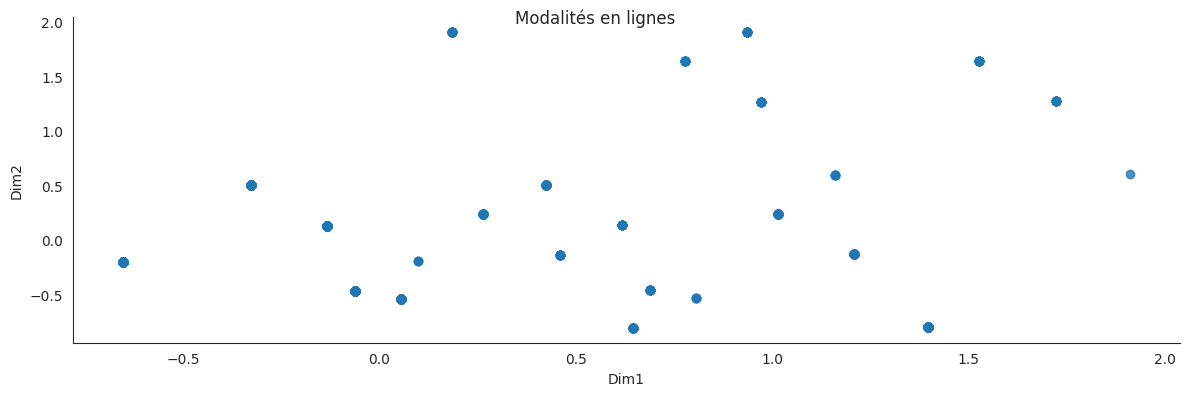

In [12]:
g_ind = sns.lmplot(x = "Dim1", y = "Dim2", data = df_ind, fit_reg = False, 
                       height = 4, aspect = 3)
g_ind.fig.suptitle("Modalités en lignes")
plt.show()

#### Représentation des variables

In [13]:
df_var = pd.DataFrame(mca.column_coordinates(df)).rename(columns = {i: "Dim"+str(i+1) for i in range(10)})
df_var

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10
Class_1st,1.151941,-1.231418,-0.890008,-0.049533,1.460940,-0.005902,0.060814,0.02363,0.239513,-0.044166
Class_2nd,0.651259,0.252522,2.392076,-0.505359,0.454055,-0.226544,0.060814,0.02363,0.239513,-0.044166
Class_3rd,0.130599,1.070050,-0.659068,-0.580899,-0.307933,-0.298099,0.060814,0.02363,0.239513,-0.044166
Class_Crew,-0.736941,-0.482727,0.082275,0.644339,-0.437074,0.312928,0.060814,0.02363,0.239513,-0.044166
Sex_Female,1.574794,0.008927,-0.009280,-0.338706,-0.501996,0.914393,0.060814,0.02363,0.239513,-0.044166
Sex_Male,-0.427587,-0.002424,0.002520,0.091965,0.136302,-0.248275,0.060814,0.02363,0.239513,-0.044166
Age_Adult,-0.067828,-0.153321,-0.001242,-0.141832,-0.059028,-0.019826,0.060814,0.02363,0.239513,-0.044166
Age_Child,1.301802,2.942646,0.023828,2.722128,1.132903,0.380510,0.060814,0.02363,0.239513,-0.044166
Survived_No,-0.509477,0.190238,-0.003751,-0.212137,0.248761,0.272994,0.060814,0.02363,0.239513,-0.044166
Survived_Yes,1.067680,-0.398669,0.007861,0.444562,-0.521314,-0.572097,0.060814,0.02363,0.239513,-0.044166


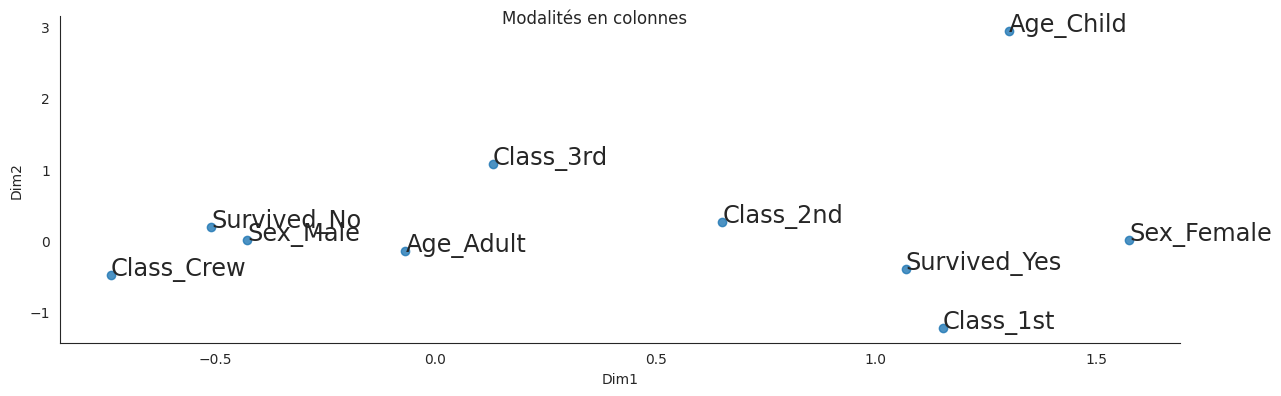

In [14]:
g_var = sns.lmplot(data=df_var, x="Dim1", y="Dim2", , fit_reg=False, 
                       height=4, aspect=3)
g_var.fig.suptitle("Modalités en colonnes")
for i in df_var.index:
    plt.text(df_var.loc[i].Dim1, df_var.loc[i].Dim2, i, size="xx-large")
plt.show()

#### Représentation simultanée

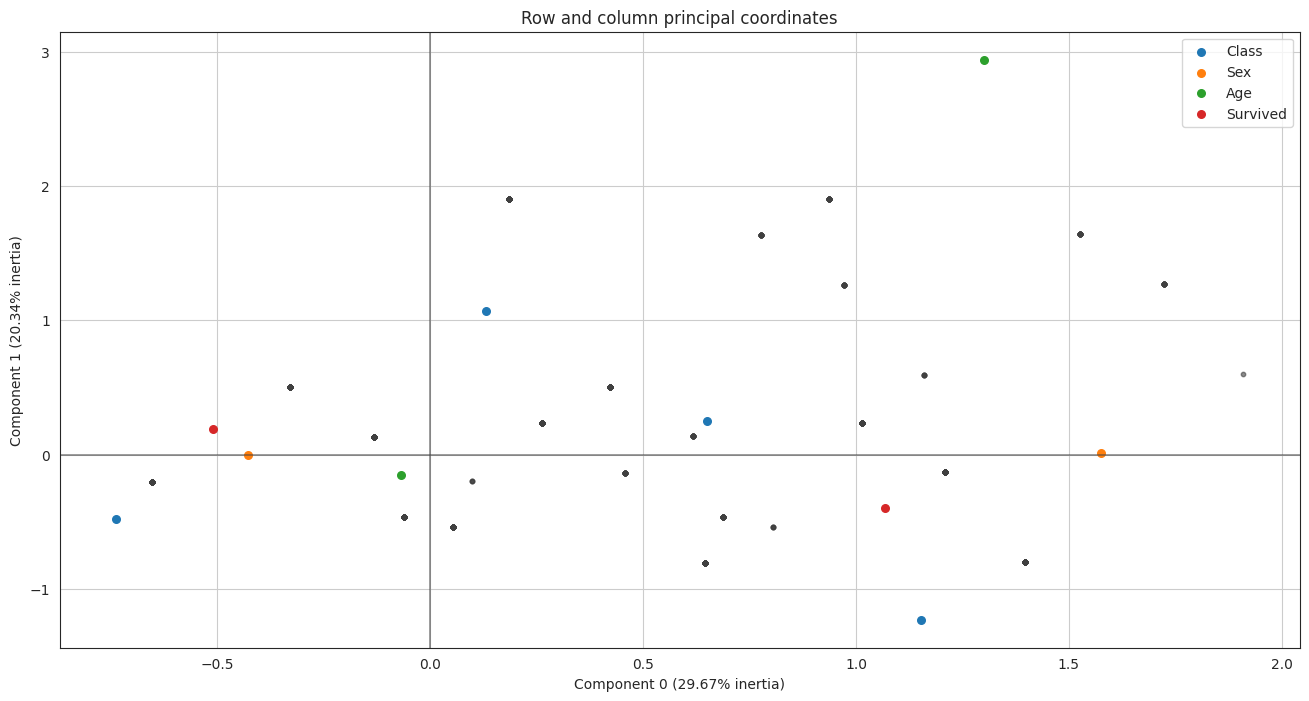

In [15]:
mca.plot_coordinates(df, figsize=(16,8))
plt.show()

<Figure size 1600x800 with 0 Axes>

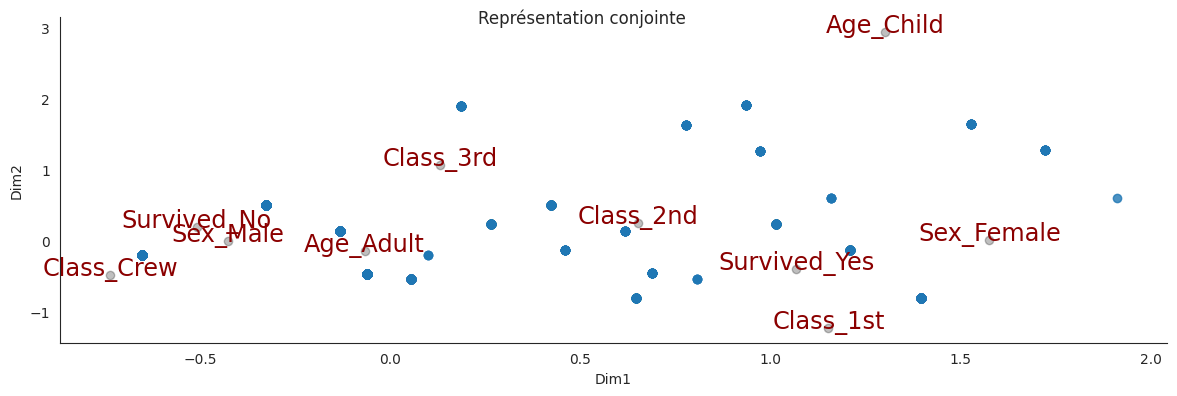

In [21]:
fig = plt.figure(figsize=(16,8))

g_simult = sns.lmplot(data=df_ind, x="Dim1", y="Dim2", fit_reg=False, 
                          height=4, aspect=3)

for i in df_var.index:
    plt.scatter(df_var.loc[i].Dim1, df_var.loc[i].Dim2, alpha=.25, c="black")
    plt.text(df_var.loc[i].Dim1, df_var.loc[i].Dim2, i, size="xx-large", color="darkred", ha="center")

g_simult.fig.suptitle("Représentation conjointe")
plt.show();